In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

/Users/Yusuf/anaconda/envs/ml-tasks/lib/python3.7/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [ ]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

# 2.KNN

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
X_train = iris_X[indices[:-10]][:,:2]
y_train = iris_y[indices[:-10]]
X_test  = iris_X[indices[-10:]][:,:2]
y_test  = iris_y[indices[-10:]]

In [5]:
n_neighbors = 15
weights = 'uniform'

In [6]:
knn = KNeighborsClassifier(n_neighbors, weights)
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [7]:
knn.predict(X_test)

array([1, 1, 2, 0, 0, 0, 2, 1, 2, 0])

In [8]:
y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [9]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1

xs,ys = np.meshgrid(np.linspace(x_min, x_max, 150),np.linspace(y_min, y_max, 150))

res = knn.predict(np.column_stack((xs.reshape(-1),ys.reshape(-1))))
res = res.reshape(150,150)

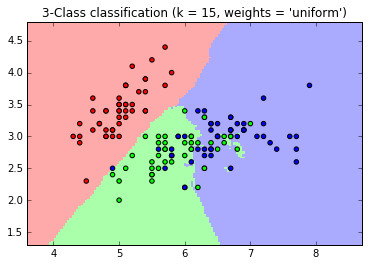

In [10]:
plt.figure()
plt.pcolormesh(xs, ys, res, cmap=cmap_light)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title("3-Class classification (k = 15, weights = 'uniform')")

plt.show()